<a href="https://colab.research.google.com/github/leodavidfan/AI_Books/blob/main/HW6_Fan_Li.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6: Discrete Probability Distributions in Machine Learning**

**Q1. Expected Value and Variance (10 points)
A data scientist is analyzing user behavior on a website. Each user’s session can be modeled
as follows:
• 60% chance of viewing only one page
• 30% chance of viewing two pages
• 10% chance of viewing three pages
(a) Define the random variable and its probability mass function
(b) Calculate the expected number of pages viewed per session
(c) Calculate the variance in the number of pages viewed
(d) Explain what these metrics tell us about user behavior**

**(a) Define the random variable and its probability mass function**

In [13]:
P_X1 = 0.60
P_X2 = 0.30
P_X3 = 0.10

**(b) Calculate the expected number of pages viewed per session**

In [14]:
E_X = 1*P_X1 + 2*P_X2 + 3*P_X3
print('mean: ', E_X)

mean:  1.5


**(c) Calculate the variance in the number of pages viewed**

In [15]:
E_X2 = 1**2*P_X1 + 2**2*P_X2 + 3**2*P_X3
VAR_X = E_X2 - E_X**2
print("variance:", VAR_X)

variance: 0.44999999999999973


**(d) Explain what these metrics tell us about user behavior**

**• The average user views 1.5 pages per session, indicating most users do not explore deeply into the website.**

Correct
Reason:
1. According to data from Littledata, the average "user view per session" (also known as "pages per session") is around 2.6 pages per session


**• The relatively small variance (0.45) suggests that user behavior is fairly consistent.**

Correct.
Reason:
1. 0.45 is relatively small value for variance


**• The distribution is right-skewed, with a small percentage of users viewing more pages.**

Correct.
Reason:
1. Right-skewed Distribution: When the distribution has a long tail towards the right side, then it is known as a right-skewed or positive-skewed distribution.
2. P(X=1)=0.6 > P(X=2)=0.3 > P(X=3)=0.1, long tail



**Q2. Bernoulli Distribution in A/B Testing (25 points)
You’re running an A/B test for a new website design. The current design has a conversion
rate of 12%.
(a) Model this as a Bernoulli distribution and write its PMF (5 points)
(b) If you observe 1000 visitors, what’s the expected number of conversions? (5 points)
(c) What’s the variance in the number of conversions? (5 points)
(d) Write a Python function that simulates this experiment 1000 times and plots the
distribution of results (10 points)**

**(a) Model this as a Bernoulli distribution and write its PMF (5 points)**
Wrong. This is not Bernoulli distribution, but a Binominal distribution, which represents p is the discrete successful rate in a sequence of n independent experiments, while bernoulli is the individual experiment with p is the discrete successful rate for yes and no decisions.


**(b) If you observe 1000 visitors, what’s the expected number of conversions? (5 points)**
The expected number of conversion is the expected value. From simulation, Mean conversions: 119.19. From hand calculation, Mean conversions: n*p = 1,000 * 12% = 120. The discrepancy is introduced by computation.


**(c) What’s the variance in the number of conversions? (5 points)**
From hand calculation, the variance is n*p(1-p)=1,000*12%*(1-12%) = 1000*0.12*(1-0.12) = 105.6. From simulation, the variance is Variance conversions: 104.69, which is the square of std. The discrepancy is introduced by computation.


**(d) Write a Python function that simulates this experiment 1000 times and plots the distribution of results (10 points)**
Shown in the histgram plot.



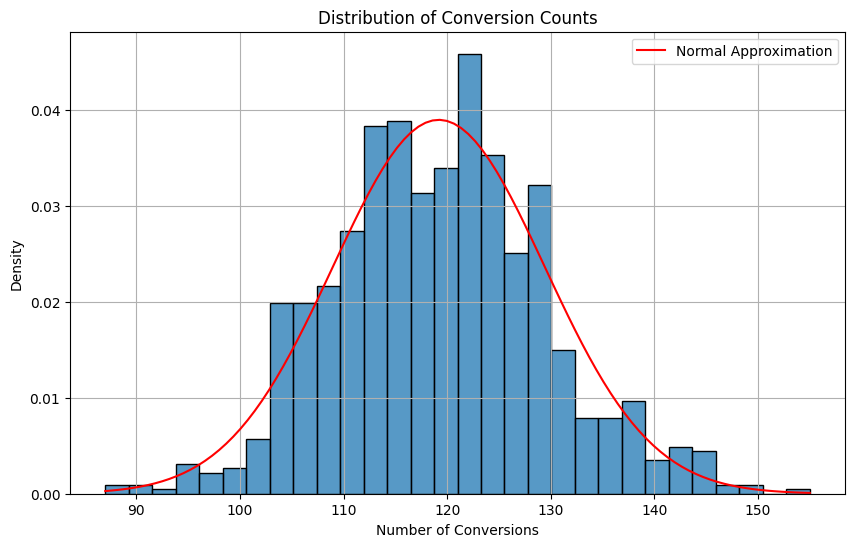

Mean conversions: 119.19
Standard deviation: 10.23
Variance conversions: 104.69


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

def simulate_ab_test(n_visitors=1000, conv_rate=0.12, n_simulations=1000):
  # Set the seed value
  np.random.seed(42)

  # Run simulations
  results = np.random.binomial(n=n_visitors, p=conv_rate, size=n_simulations)

  # Plot distribution
  plt.figure(figsize=(10, 6))

  sns.histplot(results, stat='density', bins=30)
  # Add normal approximation curve
  x = np.linspace(results.min(), results.max(), 100)
  y = np.exp(-(x - np.mean(results))**2 / (2 * np.var(results))) \
    / np.sqrt(2 * np.pi * np.var(results))
  plt.plot(x, y, 'r-', label='Normal Approximation')

  plt.title('Distribution of Conversion Counts')
  plt.xlabel('Number of Conversions')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.show()

  return results

# Run simulation
results = simulate_ab_test()
print(f"Mean conversions: {np.mean(results):.2f}")
print(f"Standard deviation: {np.std(results):.2f}")

# added calculcation
print(f"Variance conversions: {np.std(results)**2:.2f}")

**Q3. Binomial Distribution Application (25 points)
A machine learning model correctly classifies emails as spam with 95% accuracy. You test
it on a batch of 200 emails.
(a) What distribution would you use to model the number of correct classifications? Justify
your answer. (5 points)
(b) Calculate the probability of getting exactly 190 correct classifications (5 points)
(c) What’s the probability of getting 185 or more correct classifications? (10 points)
(d) If you needed to guarantee 90% accuracy with 95% confidence, how many emails would
you need to test? (5 points)**

**(a) What distribution would you use to model the number of correct classifications? Justify your answer. (5 points)**

Correct.
Reason:

The number of correct classifications follows a Binomial distribution:

• Each email classification is a Bernoulli trial (success/failure)

• There is a fixed number of trials (n = 200)

• Trials are independent

• The probability of success (p = 0:95) is constant

**(b) Calculate the probability of getting exactly 190 correct classifications (5 points)**

From hand calculation, using the binomial PMF formula:
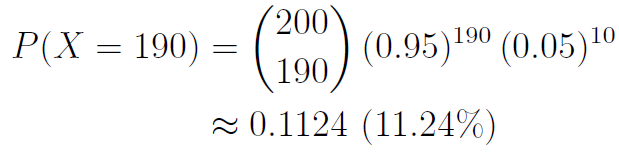

In [28]:
# method 1
import math

prob1 = math.comb(200, 190) * (0.95)**190 * (0.05)**10
print(f"P(X = 190) = {prob1:.4f}")

P(X = 190) = 0.1284


In [32]:
# method 2
from scipy.stats import binom

n, p = 200, 0.95
k = 190
prob = binom.pmf(k, n, p)
print(f"P(X = 190) = {prob:.4f}")

P(X = 190) = 0.1284


**(c) What’s the probability of getting 185 or more correct classifications? (10 points)**

In [33]:
prob = 1 - binom.cdf(184, n, p)
print(f"P(X >= 185) = {prob:.4f}")

P(X >= 185) = 0.9556


**(d) If you needed to guarantee 90% accuracy with 95% confidence, how many emails would you need to test? (5 points)**

In [31]:
from scipy.stats import norm
import numpy as np

def find_sample_size(desired_accuracy=0.90, confidence=0.95, p=0.95):
  z = norm.ppf((1 + confidence) / 2)
  margin_error = 1 - desired_accuracy
  n = (z**2 * p * (1-p)) / margin_error**2
  return int(np.ceil(n))

n = find_sample_size()
print(f"Required sample size: {n}")

Required sample size: 19


**Q4. Poisson Distribution in Practice (30 points)
A website receives an average of 8 API requests per minute.
(a) Write the PMF for this scenario (5 points)
(b) Calculate the probability of receiving:
• Exactly 5 requests in a minute (5 points)
• More than 10 requests in a minute (5 points)
• No requests in a minute (5 points)
(c) Write a Python function that:
• Simulates request arrivals for 60 minutes
• Plots the distribution of inter-arrival times
• Compares the simulated distribution to the theoretical Poisson distribution (10
points)**

**(a) Write the PMF for this scenario (5 points)**

**(b) Calculate the probability of receiving:
• Exactly 5 requests in a minute (5 points)
• More than 10 requests in a minute (5 points)• No requests in a minute (5 points)**

In [34]:
from scipy.stats import poisson

lambda_ = 8

# Exactly 5 requests
p_5 = poisson.pmf(5, lambda_)
print(f"P(X = 5) = {p_5:.4f}") # 􀀀0.0916

# More than 10 requests
p_more_10 = 1 - poisson.cdf(10, lambda_)
print(f"P(X > 10) = {p_more_10:.4f}") # 􀀀0.1912

# No requests
p_0 = poisson.pmf(0, lambda_)
print(f"P(X = 0) = {p_0:.4f}") # 􀀀0.0003

P(X = 5) = 0.0916
P(X > 10) = 0.1841
P(X = 0) = 0.0003


**(c) Write a Python function that: • Simulates request arrivals for 60 minutes • Plots the distribution of inter-arrival times • Compares the simulated distribution to the theoretical Poisson distribution (10 points)**

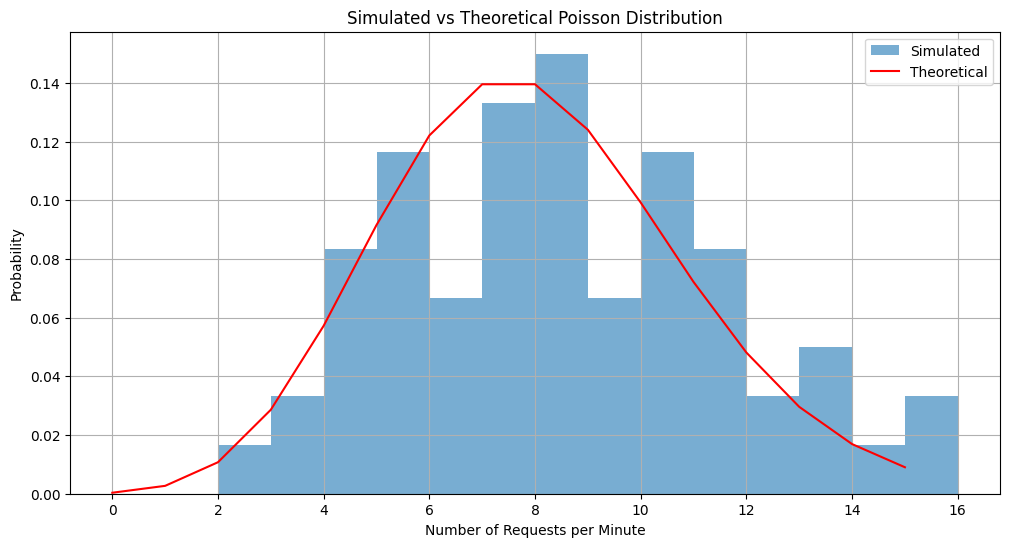

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def simulate_poisson_process(lambda_rate=8, duration=60):
  # Generate inter-arrival times (exponential distribution)
  times = np.random.exponential(1/lambda_rate, size=1000)
  arrival_times = np.cumsum(times)

  # Count events per minute
  counts = np.zeros(duration)
  for t in arrival_times:
    if t >= duration:
      break
    counts[int(t)] += 1

  # Plot results
  plt.figure(figsize=(12, 6))

  # Histogram of simulated data
  plt.hist(counts, bins=range(int(max(counts))+2), density=True,
  alpha=0.6, label='Simulated')

  # Theoretical Poisson PMF
  k = range(int(max(counts))+1)
  pmf = poisson.pmf(k, lambda_rate)
  plt.plot(k, pmf, 'r-', label='Theoretical')

  plt.title('Simulated vs Theoretical Poisson Distribution')
  plt.xlabel('Number of Requests per Minute')
  plt.ylabel('Probability')
  plt.legend()
  plt.grid(True)

  plt.show()

  return counts

# Run simulation
counts = simulate_poisson_process()

**Q5. Overdispersion (10 points)
Explain how you would modify your analysis if you discovered that the API requests showed
signs of overdispersion (variance > mean). What alternative distribution might be more
appropriate, and why?**

**(10 points) Explain how you would modify your analysis if you discovered that the API requests showed signs of overdispersion (variance > mean).**

If the API requests show overdispersion (variance > mean):
1. The Negative Binomial distribution would be more appropriate because:

• It has an additional parameter that allows variance to exceed the mean

• It can model clustering of events

• It’s often used for “contagious” processes where one event increases the likelihood of another

**2. Implementation approach:**

In [36]:
from scipy.stats import nbinom

def fit_negative_binomial(data):
  mean = np.mean(data)
  var = np.var(data)
  p = mean/var
  n = mean*p/(1-p)
  return n, p

# Fit to data
n, p = fit_negative_binomial(counts)

# Compare distributions
k = np.arange(max(counts))
nb_pmf = nbinom.pmf(k, n, p)
poisson_pmf = poisson.pmf(k, np.mean(counts))

plt.plot(k, nb_pmf, label='Negative Binomial')
plt.plot(k, poisson_pmf, label='Poisson')
plt.legend()
plt.show()

NameError: name 'data' is not defined

**3. Real-world causes of overdispersion in API requests:**

• Burst traffic patterns

• Time-of-day effects

• Cascading requests

• Bot activity

• System dependencies

In [12]:
# debug
1000*0.12*(1-0.12)

105.6

In [ ]:
# (a) Define the random variable and its probability mass function
P_X1 = 0.60
P_X2 = 0.30
P_X3 = 0.10

# (b)
E_X = 1*P_X1 + 2*P_X2 + 3*P_X3
print('mean: ', E_X)

# (c)
E_X2 = 1**2*P_X1 + 2**2*P_X2 + 3**2*P_X3
VAR_X = E_X2 - E_X**2
print("variance:", VAR_X)

In [25]:
import math
math.comb(200, 190) * (0.95)**190 * (0.05)**10

0.12835737340035142